# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [24]:
# Import your libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [9]:
# Your code here
sample_size = [10, 50, 500, 5000]
sample = []
for i,size in enumerate(sample_size):
    sample.append(np.random.normal(50,5,size))    

In [10]:
pval = []
for sam in sample:
    pval.append(stats.normaltest(sam))
pval

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=8.36818483893854, pvalue=0.015236027590844206),
 NormaltestResult(statistic=0.12172710117059837, pvalue=0.9409516233151443),
 NormaltestResult(statistic=0.0351204182091136, pvalue=0.9825930728349614),
 NormaltestResult(statistic=2.5938859431998234, pvalue=0.27336620522630134)]

#### Interpret the normaltest results and make your observations.

In [11]:
# Explain the test results here
#All samples are distributed in a normal becuase the pvalue for all of them is greater than .05

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

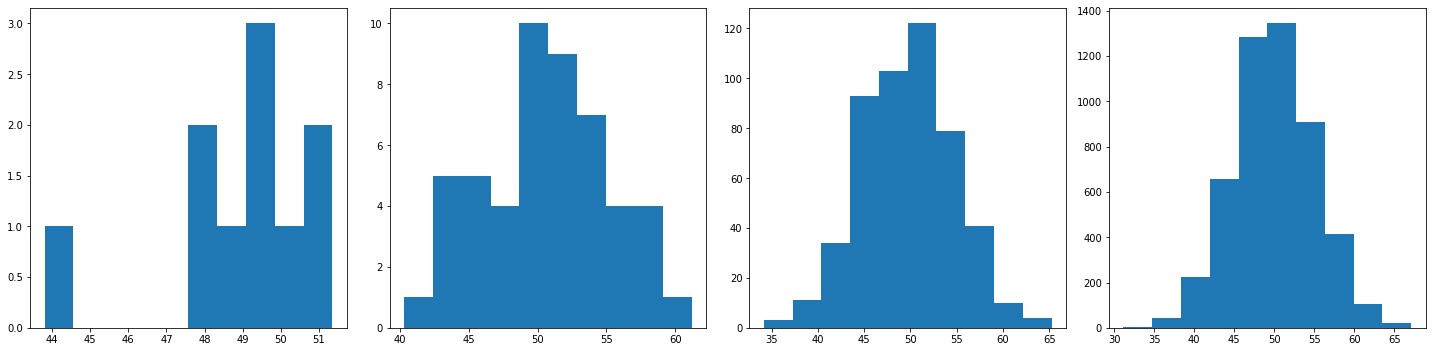

In [16]:
# Your code here
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.hist(sample[0])
plt.subplot(1,4,2)
plt.hist(sample[1])
plt.subplot(1,4,3)
plt.hist(sample[2])
plt.subplot(1,4,4)
plt.hist(sample[3])
plt.tight_layout()

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# In higher samples the values are close to the mean ans the sample seems more normalized

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

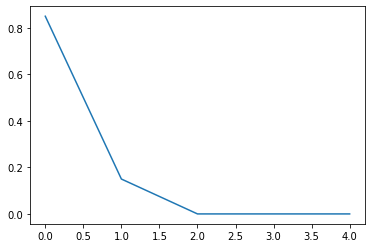

In [35]:
# Your code here
pmf_binom = stats.binom(1,0.15)
ploting = []
for i in range(5):
    ploting.append(pmf_binom.pmf(i))

plt.plot(ploting)

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
